<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication/blob/main/GQtest_data_multi_delta_(_2_8)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.029281,39.585940,93.874565,0.004140,194.493925,194.490245,0.003680
1,0.0,1.0,60.832094,66.155226,84.443744,0.004792,221.435856,221.431002,0.004855
2,0.0,2.0,58.631366,49.501755,60.945837,-0.000234,179.078724,179.078827,-0.000102
3,0.0,3.0,69.662376,28.502180,44.962386,-0.005701,153.121241,153.126313,-0.005072
4,0.0,4.0,94.440474,84.455642,34.099740,0.003395,222.999251,222.994044,0.005207
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,53.982254,26.520146,79.793200,-0.005429,170.290172,170.292803,-0.002631
119996,999.0,116.0,63.240532,22.503084,93.267353,-0.017519,188.993450,189.007643,-0.014193
119997,999.0,117.0,48.008160,78.635008,98.786898,-0.002062,235.428004,235.428535,-0.000531
119998,999.0,118.0,42.383094,52.373718,47.698809,0.001962,152.457583,152.454713,0.002869


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.029281,39.585940,93.874565,0.004140,194.493925,194.490245,0.003680
1,0.0,1.0,60.832094,66.155226,84.443744,0.004792,221.435856,221.431002,0.004855
2,0.0,2.0,58.631366,49.501755,60.945837,-0.000234,179.078724,179.078827,-0.000102
3,0.0,3.0,69.662376,28.502180,44.962386,-0.005701,153.121241,153.126313,-0.005072
4,0.0,4.0,94.440474,84.455642,34.099740,0.003395,222.999251,222.994044,0.005207
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,53.982254,26.520146,79.793200,-0.005429,170.290172,170.292803,-0.002631
119996,999.0,116.0,63.240532,22.503084,93.267353,-0.017519,188.993450,189.007643,-0.014193
119997,999.0,117.0,48.008160,78.635008,98.786898,-0.002062,235.428004,235.428535,-0.000531
119998,999.0,118.0,42.383094,52.373718,47.698809,0.001962,152.457583,152.454713,0.002869


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.029281  39.585940  93.874565  ...  194.493925  194.490245  0.003680
      1.0    60.832094  66.155226  84.443744  ...  221.435856  221.431002  0.004855
      2.0    58.631366  49.501755  60.945837  ...  179.078724  179.078827 -0.000102
      3.0    69.662376  28.502180  44.962386  ...  153.121241  153.126313 -0.005072
      4.0    94.440474  84.455642  34.099740  ...  222.999251  222.994044  0.005207
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  53.982254  26.520146  79.793200  ...  170.290172  170.292803 -0.002631
      116.0  63.240532  22.503084  93.267353  ...  188.993450  189.007643 -0.014193
      117.0  48.008160  78.635008  98.786898  ...  235.428004  235.428535 -0.000531
      118.0  42.383094  52.373718  47.698809  ...  152.457583  152.454713  0.002869
      119.0  23.790553  61.117026  97.906808  ...  192.817987  192.812152  0.005835

[120000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.029281  39.585940  93.874565  ...  194.493925  194.490245  0.003680
      1.0    60.832094  66.155226  84.443744  ...  221.435856  221.431002  0.004855
      2.0    58.631366  49.501755  60.945837  ...  179.078724  179.078827 -0.000102
      3.0    69.662376  28.502180  44.962386  ...  153.121241  153.126313 -0.005072
      4.0    94.440474  84.455642  34.099740  ...  222.999251  222.994044  0.005207
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  53.982254  26.520146  79.793200  ...  170.290172  170.292803 -0.002631
      116.0  63.240532  22.503084  93.267353  ...  188.993450  189.007643 -0.014193
      117.0  48.008160  78.635008  98.786898  ...  235.428004  235.428535 -0.000531
      118.0  42.383094  52.373718  47.698809  ...  152.457583  152.454713  0.002869
      119.0  23.790553  61.117026  97.906808  ...  192.817987  192.812152  0.005835

[120000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,51.029281,39.585940,93.874565,0.004140,194.493925,194.490245,0.003680
1,0.0,1.0,60.832094,66.155226,84.443744,0.004792,221.435856,221.431002,0.004855
2,0.0,2.0,58.631366,49.501755,60.945837,-0.000234,179.078724,179.078827,-0.000102
3,0.0,3.0,69.662376,28.502180,44.962386,-0.005701,153.121241,153.126313,-0.005072
4,0.0,4.0,94.440474,84.455642,34.099740,0.003395,222.999251,222.994044,0.005207
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,53.982254,26.520146,79.793200,-0.005429,170.290172,170.292803,-0.002631
119996,999.0,116.0,63.240532,22.503084,93.267353,-0.017519,188.993450,189.007643,-0.014193
119997,999.0,117.0,48.008160,78.635008,98.786898,-0.002062,235.428004,235.428535,-0.000531
119998,999.0,118.0,42.383094,52.373718,47.698809,0.001962,152.457583,152.454713,0.002869


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         x3  ...           Y       y_hat     e_hat
rep   index                                   ...                                  
0.0   0.0    51.029281  39.585940  93.874565  ...  194.493925  194.490245  0.003680
      1.0    60.832094  66.155226  84.443744  ...  221.435856  221.431002  0.004855
      2.0    58.631366  49.501755  60.945837  ...  179.078724  179.078827 -0.000102
      3.0    69.662376  28.502180  44.962386  ...  153.121241  153.126313 -0.005072
      4.0    94.440474  84.455642  34.099740  ...  222.999251  222.994044  0.005207
...                ...        ...        ...  ...         ...         ...       ...
999.0 115.0  53.982254  26.520146  79.793200  ...  170.290172  170.292803 -0.002631
      116.0  63.240532  22.503084  93.267353  ...  188.993450  189.007643 -0.014193
      117.0  48.008160  78.635008  98.786898  ...  235.428004  235.428535 -0.000531
      118.0  42.383094  52.373718  47.698809  ...  152.457583  152.454713  0.002869
      119.0  23.790553  61.117026  97.906808  ...  192.817987  192.812152  0.005835

[120000 rows x 7 columns]

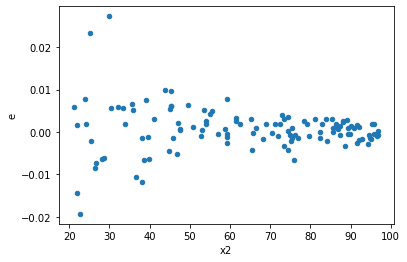

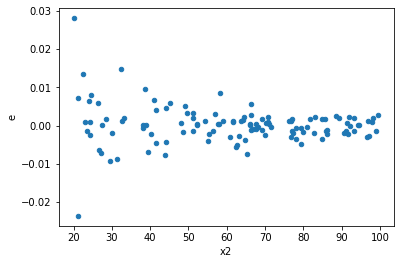

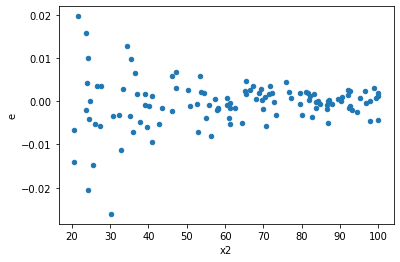

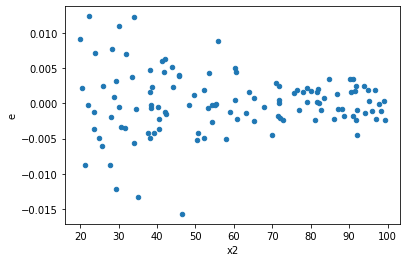

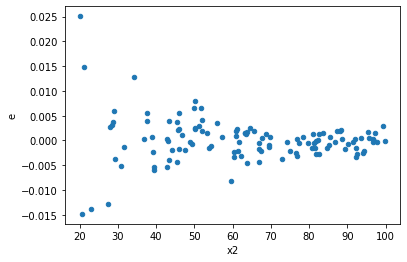

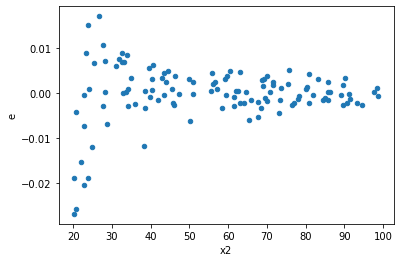

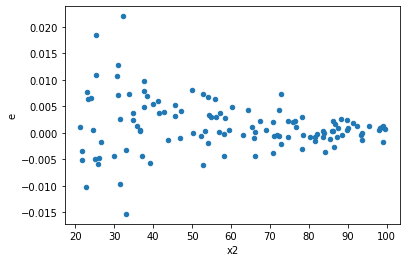

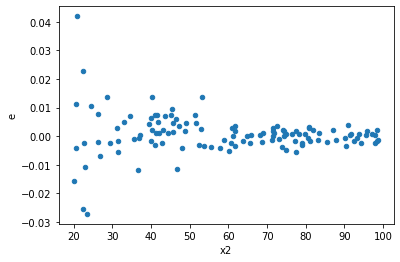

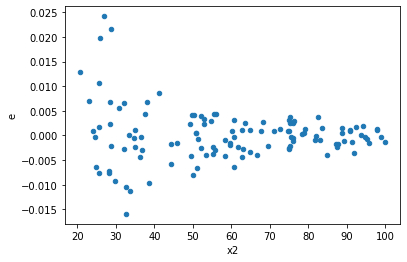

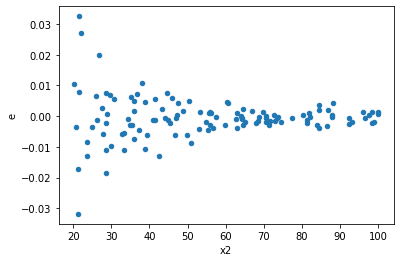

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,45.0,45.0,0.0025816389419886414,0.0001661304403094193,5.736975426641425e-05,3.69178756243154e-06,0.06435076478256432,4.4280118302702017e-16,Reject005=0 : Heteroscedasticity
1.0,45.0,45.0,0.0029213143235641732,0.0001858906112012088,6.491809607920386e-05,4.130902471137974e-06,0.06363252653155498,3.541041768593705e-16,Reject005=0 : Heteroscedasticity
2.0,45.0,45.0,0.0034306100539401984,0.00021720178596737152,7.623577897644885e-05,4.826706354830478e-06,0.06331287513073841,3.2028077427032413e-16,Reject005=0 : Heteroscedasticity
3.0,45.0,45.0,0.0016558018528810845,0.00017964901576184578,3.679559673069077e-05,3.9922003502632395e-06,0.10849668723903022,9.835403693011254e-12,Reject005=0 : Heteroscedasticity
4.0,45.0,45.0,0.002634279382473566,0.0001522187991940925,5.853954183274591e-05,3.3826399820909442e-06,0.0577838479118188,5.127740396421607e-17,Reject005=0 : Heteroscedasticity
5.0,45.0,45.0,0.002733639202525339,0.00022808809775510435,6.074753783389642e-05,5.068624394557875e-06,0.08343752809236725,7.12476881457673e-14,Reject005=0 : Heteroscedasticity
6.0,45.0,45.0,0.0015272740184337774,0.00021875670949571307,3.393942263186172e-05,4.861260211015846e-06,0.14323343869887115,1.3568280049239323e-09,Reject005=0 : Heteroscedasticity
7.0,45.0,45.0,0.0034662862642327397,0.0002481902983191682,7.702858364961644e-05,5.515339962648183e-06,0.0716012121907378,3.65396105290988e-15,Reject005=0 : Heteroscedasticity
8.0,45.0,45.0,0.0029127046633755137,0.00014651737784634978,6.472677029723364e-05,3.255941729918884e-06,0.05030286101047807,3.073566359545294e-18,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64